In [1]:
#imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part 1 - Computer Vision Functions:

### Stage 1:

In [2]:
#Importing the images with mask

scene_1 = cv2.imread('images\Scene1.jpeg') #jpeg
scene_2 = cv2.imread('images\Scene2.jpeg') #jpeg
targ_mask = cv2.imread('images/targetMask.png') #png

In [3]:
#Object Extraction

def ExtractObject(S2, ObjectMask):
    
    S2 = cv2.cvtColor(S2, cv2.COLOR_BGR2RGB) #converting to rgb
    
    extr_obj = S2 * ObjectMask
    
    return extr_obj #return img of extracted object


In [4]:
extr_obj_one = ExtractObject(scene_2, targ_mask)

In [5]:
extr_obj_img = ExtractObject(extr_obj_one, targ_mask)

In [6]:
extr_obj_img = cv2.cvtColor(extr_obj_img, cv2.COLOR_BGR2RGB)

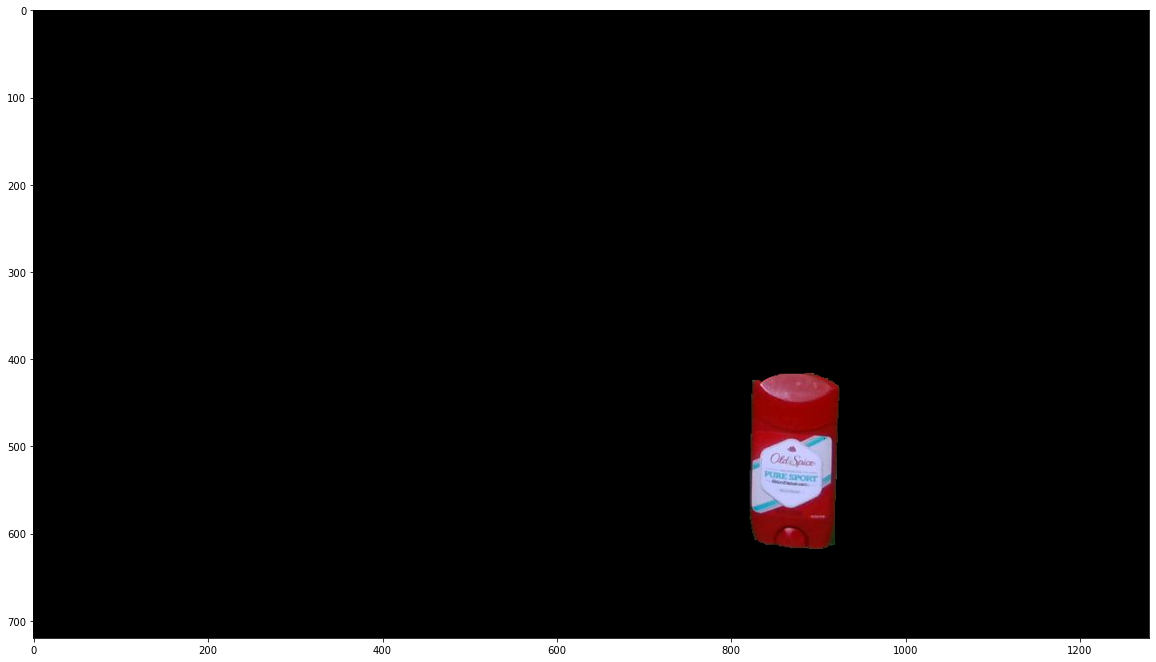

In [7]:
#Displaying the extracted object
plt.figure(figsize=(20,20))
plt.imshow(extr_obj_img)
plt.show()

In [8]:
#https://docs.opencv.org/3.4/index.html
#https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
#https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/#:~:text=OpenCV%20provides%20cv2.gaussianblur%20%28%29%20function%20to%20apply%20Gaussian,sigmaX%20%20%20dst%20%5B%2C%20sigmaY%20%5B%2C%20borderType%3DBORDER_DEFAULT%5D%5D%5D%29
#https://www.tutorialspoint.com/opencv/opencv_box_filter.htm

def ApplyFilter(ExtractedObject, FilterIndex):
    
    if FilterIndex == 0:
        #no conv filter
        return ExtractedObject
        
    elif FilterIndex == 1:
        #guassian
        FilteredExObject = cv2.GaussianBlur(ExtractedObject,(3,3),0)
        return FilteredExObject        
        
    elif FilterIndex == 2:
        #sobel x
        FilteredExObject = cv2.Sobel(ExtractedObject, cv2.CV_8U,1,0) # x-axis
        return FilteredExObject
        
    elif FilterIndex == 3:
        #box filter
        
        FilteredExObject = cv2.boxFilter(ExtractedObject,cv2.CV_8U,(3, 3),borderType=cv2.BORDER_REPLICATE)
        return FilteredExObject
    

In [9]:
nofilt_extr_img = ApplyFilter(extr_obj_img, 0)
guas_extr_img = ApplyFilter(extr_obj_img, 1)
sobel_x_img = ApplyFilter(extr_obj_img, 2)
box_filter_img = ApplyFilter(extr_obj_img, 3)

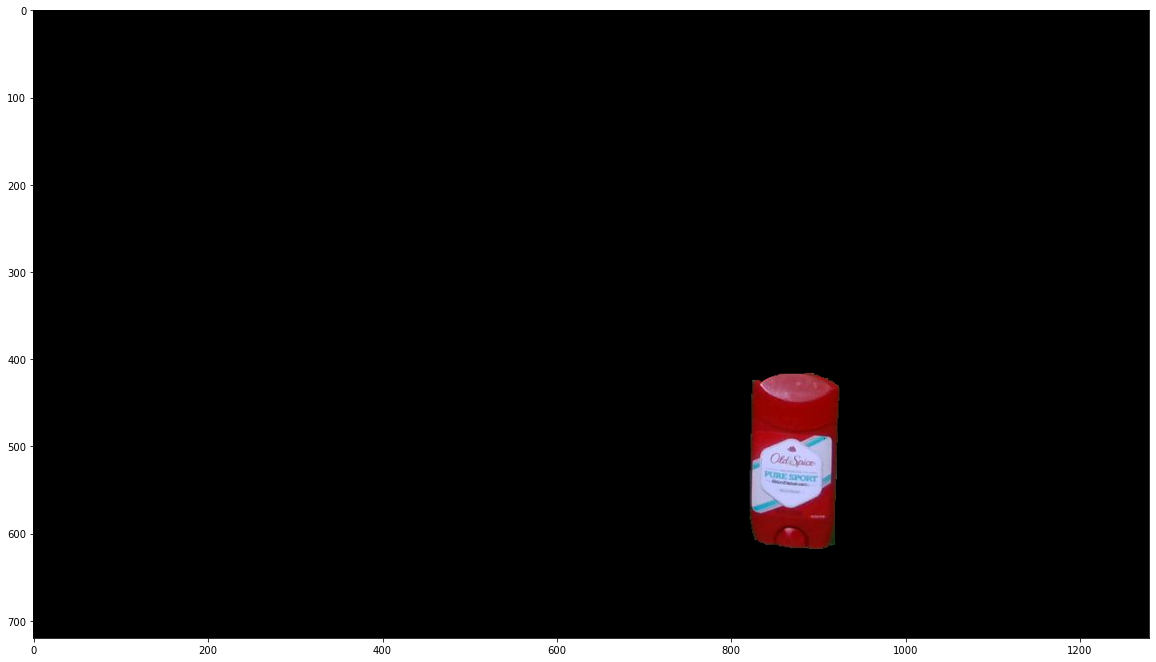

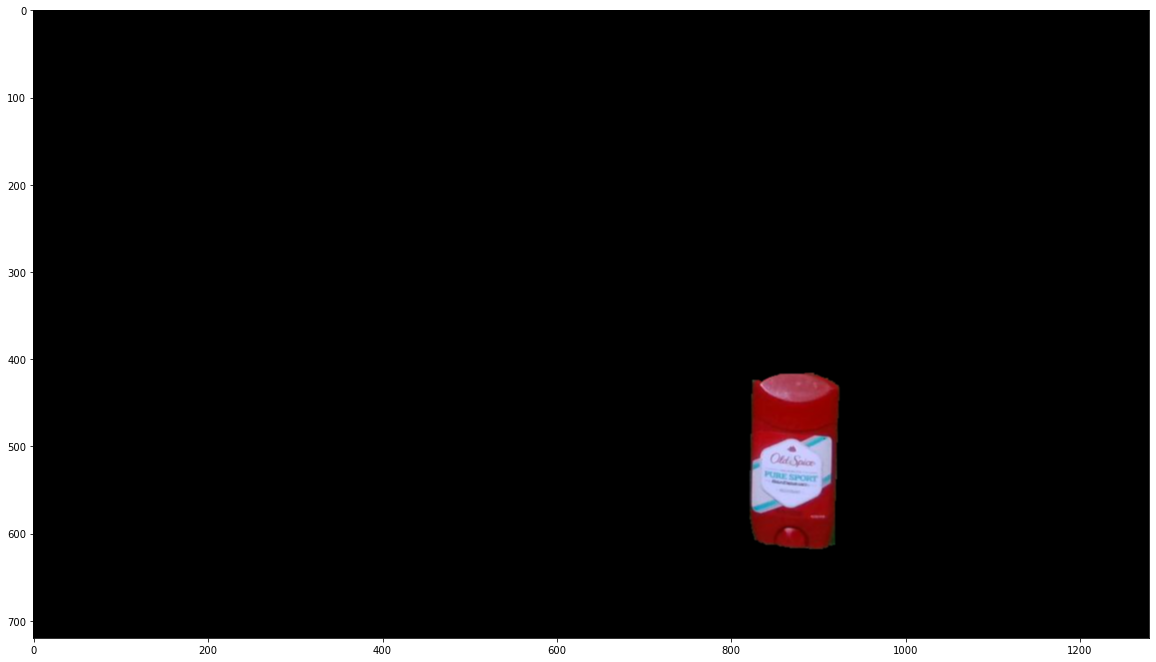

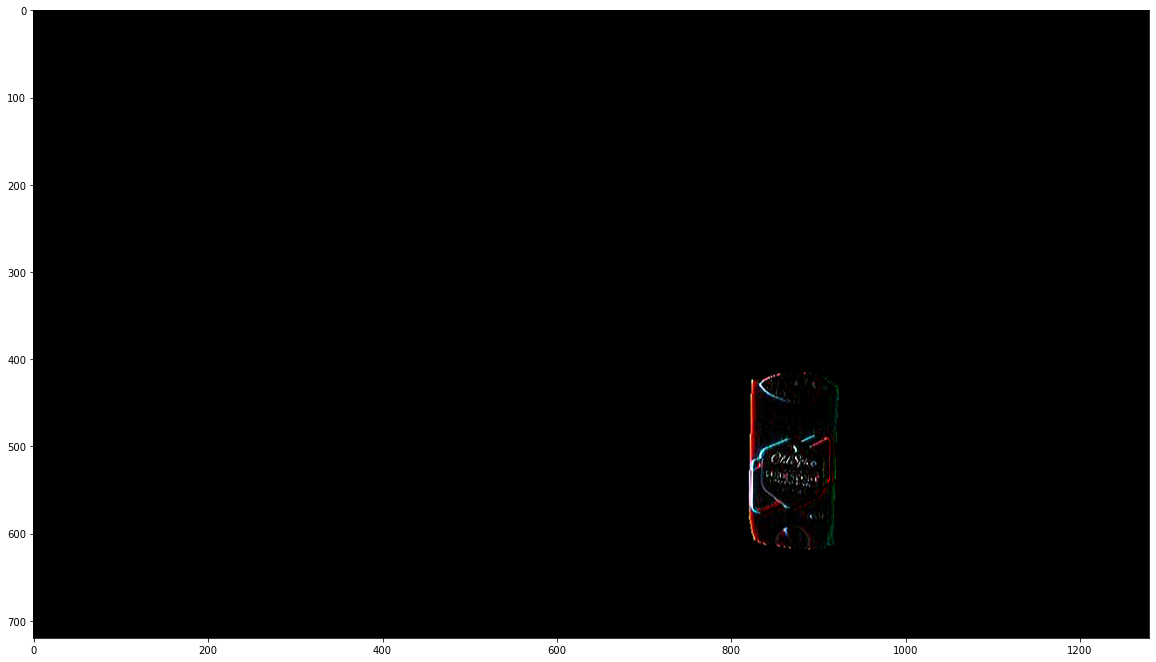

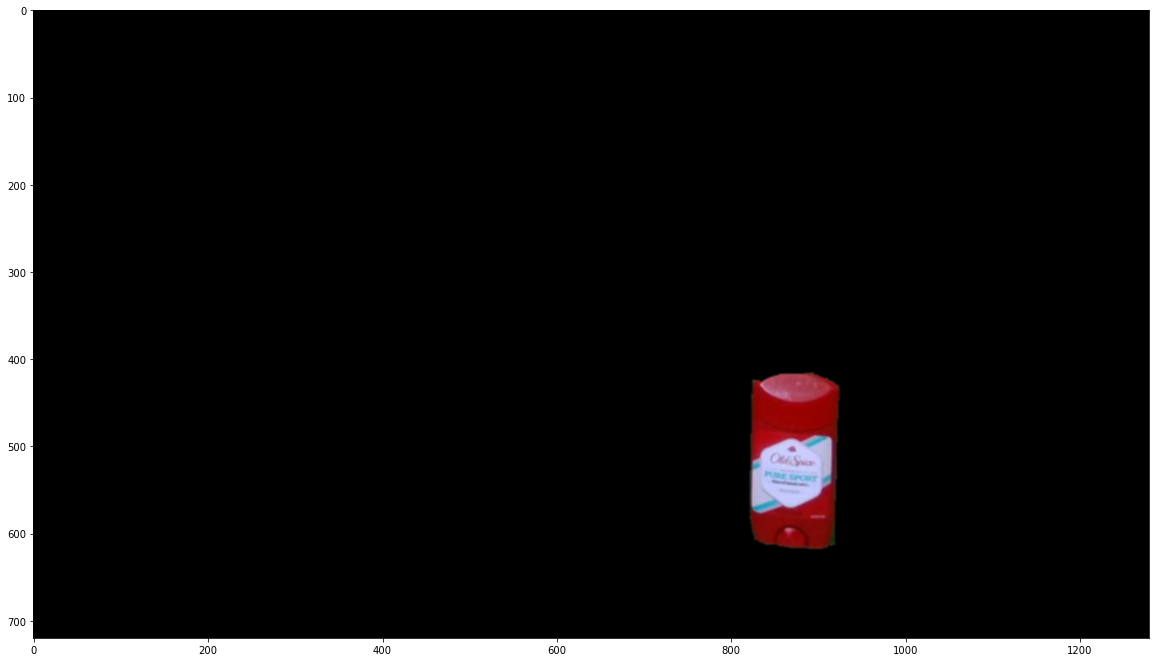

In [10]:
#Displaying the extracted object
plt.figure(figsize=(20,20))
#nofilt_extr_img
plt.imshow(nofilt_extr_img)
plt.show()

#Displaying the extracted object
plt.figure(figsize=(20,20))
#guas_extr_img
plt.imshow(guas_extr_img)
plt.show()

#Displaying the extracted object
plt.figure(figsize=(20,20))
#sobel_x_img
plt.imshow(sobel_x_img)
plt.show()

#Displaying the extracted object
plt.figure(figsize=(20,20))
#box_filter_img
plt.imshow(box_filter_img)
plt.show()

In [11]:
#Object Blender

#https://medium.com/featurepreneur/blending-images-using-opencv-bfc9ab3697b7#:~:text=OpenCV-Python%20uses%20the%20addWeighted%20%28%29%20function%20to%20blend,and%20its%20parameters%20are%20as%20follows.%20dst%3Dcv.addWeighted%20%28src1%2C

def ObjectBlender(S1, FilteredExObject):
    
    S1 = cv2.cvtColor(S1, cv2.COLOR_BGR2RGB)
    BlendingResult = cv2.addWeighted(S1, 0.6, FilteredExObject, 0.8, 0) #adjusting weights until a proper blended image is viewed
    
    return BlendingResult

In [12]:
#Blending no kernel
blended_scene = ObjectBlender(scene_1, nofilt_extr_img)

In [13]:
#Blending guassian kernel
blended_guass = ObjectBlender(scene_1, guas_extr_img)

In [14]:
#Blending sobel kernel
blended_scene_sob = ObjectBlender(scene_1, sobel_x_img)

In [15]:
#Blending box filter
blended_scene_box = ObjectBlender(scene_1, box_filter_img)

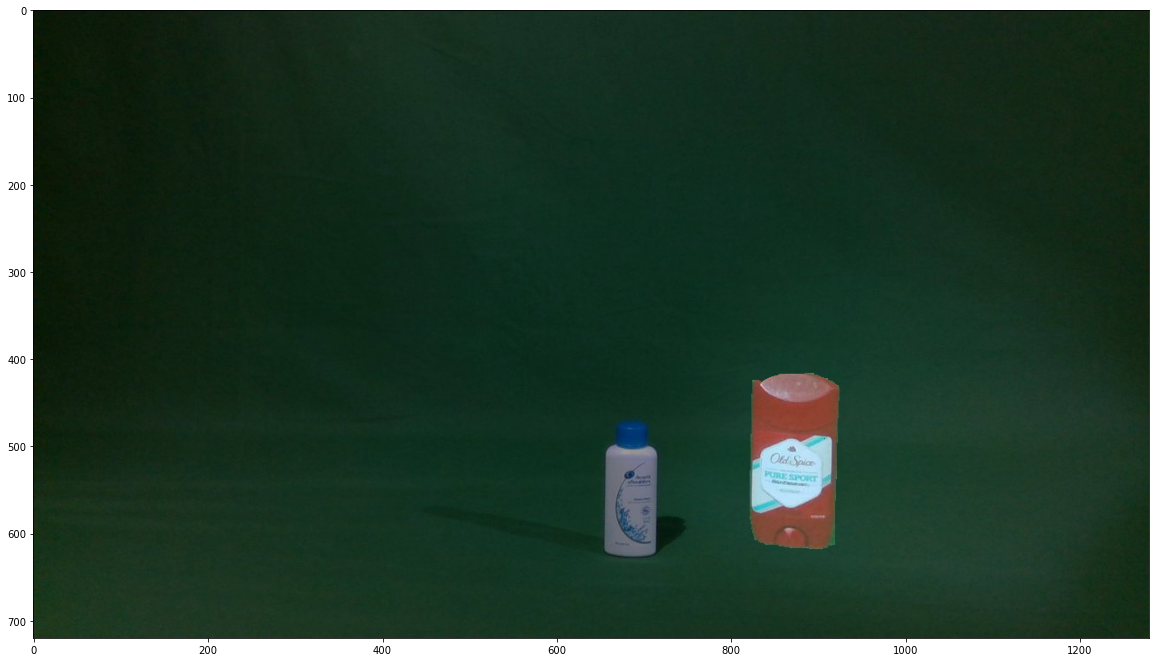

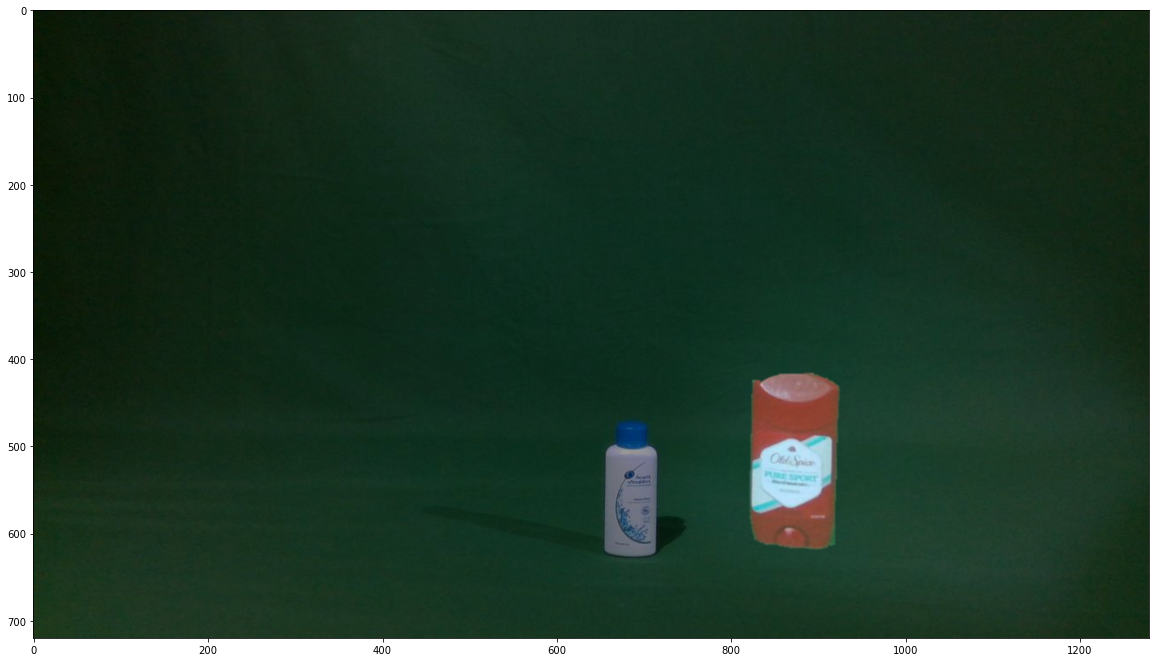

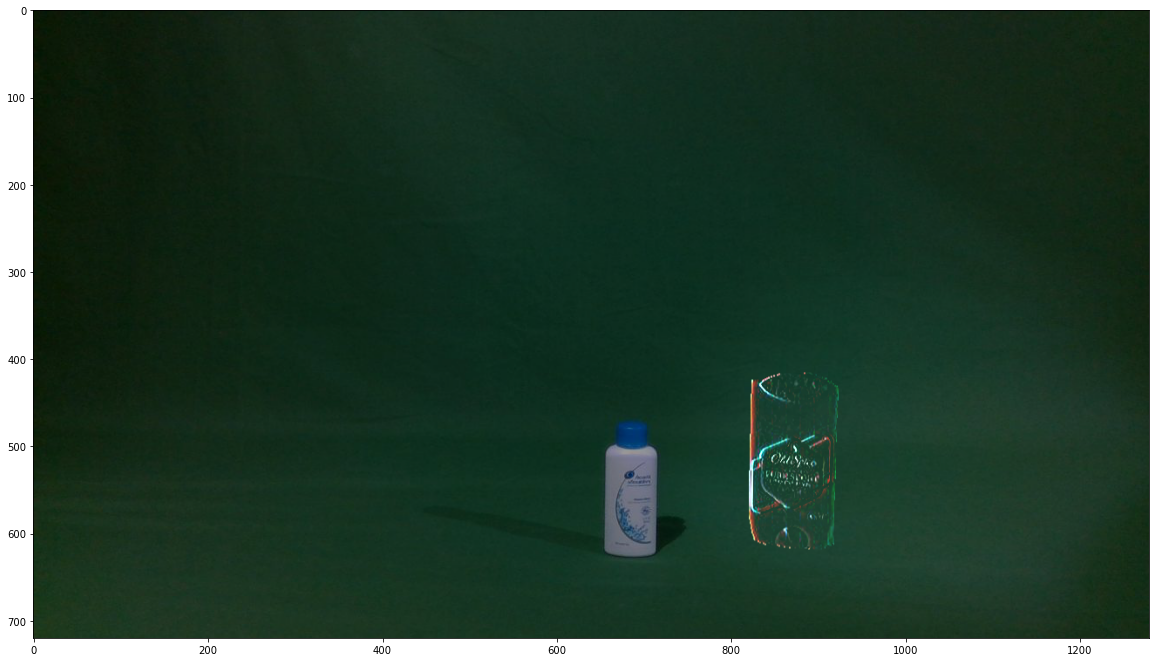

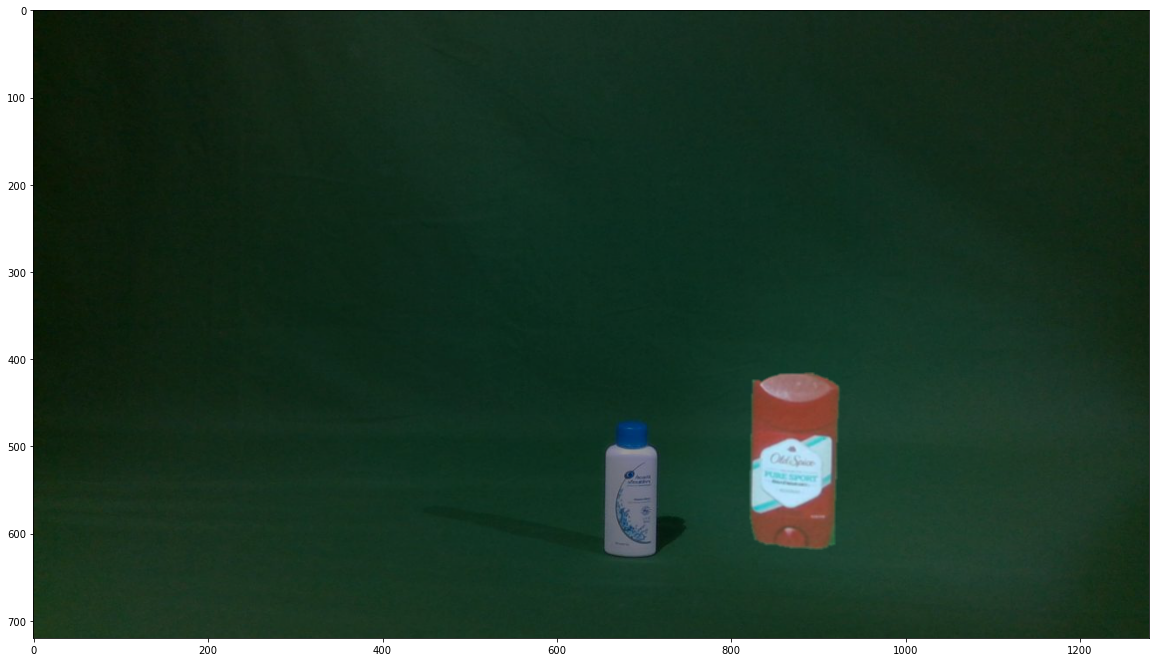

In [16]:
plt.figure(figsize=(20,20))
plt.imshow(blended_scene)
plt.show()

plt.figure(figsize=(20,20))
plt.imshow(blended_guass)
plt.show()

plt.figure(figsize=(20,20))
plt.imshow(blended_scene_sob)
plt.show()

plt.figure(figsize=(20,20))
plt.imshow(blended_scene_box)
plt.show()

In [17]:
#https://stackoverflow.com/questions/29642488/image-ssd-calculation-error-value

def CompareResult(BlendingResult, S2, metric):
    
    if metric == 1: #ssd (sum of squared differences)
        #lower ssd the more similar
        s = ((S2 - BlendingResult)**2).sum()

        return s
        
    elif metric == 2: #mse (mean squared error)
        BlendingResult = BlendingResult.reshape(BlendingResult.shape[0], -1)
        S2 = S2.reshape(S2.shape[0], -1)
        mse = mean_squared_error(S2, BlendingResult)
        return mse

In [18]:
print(CompareResult(blended_scene, scene_2, 1))
print(CompareResult(blended_guass, scene_2, 1))
print(CompareResult(blended_scene_sob, scene_2, 1))
print(CompareResult(blended_scene_box, scene_2, 1))
print(CompareResult(blended_scene, scene_2, 2))
print(CompareResult(blended_guass, scene_2, 2))
print(CompareResult(blended_scene_sob, scene_2, 2))
print(CompareResult(blended_scene_box, scene_2, 2))

272421292
272421628
272507021
272440536
98.53200665509259
98.53212818287037
98.56301396122686
98.53896701388888


### Stage 2:

In [19]:
#https://stackoverflow.com/questions/51719472/remove-green-background-screen-from-image-using-opencv-python
#https://www.geeksforgeeks.org/background-subtraction-opencv/

def RemoveGreen(img):
    #Performing basic masking
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    a_channel = lab[:,:,1]
    th = cv2.threshold(a_channel,127,255,cv2.THRESH_BINARY)[1]
    masked = cv2.bitwise_and(img, img, mask = th)    # contains dark background
    m1 = masked.copy()
    m1[th==0]=(255,255,255)                          # contains white background
    # isolating the green background  and Masking the original image with the binary mask

    # Removing the green shade along the border 
    mlab = cv2.cvtColor(masked, cv2.COLOR_BGR2LAB)
    dst = cv2.normalize(mlab[:,:,1], dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    threshold_value = 100
    dst_th = cv2.threshold(dst, threshold_value, 255, cv2.THRESH_BINARY_INV)[1]
    mlab2 = mlab.copy()
    mlab[:,:,1][dst_th == 255] = 127

    #Converting the image into BGR and the pixels that were dark (0) in the threshold image are set to white
    img2 = cv2.cvtColor(mlab, cv2.COLOR_LAB2BGR)
    img2[th==0]=(255,255,255)

    return img2

In [20]:
#https://www.geeksforgeeks.org/background-subtraction-opencv
#https://stackoverflow.com/questions/51719472/remove-green-background-screen-from-image-using-opencv-python

def NewBackground(imgNoBg, NewBackground):
 
    img = imgNoBg.copy()
    bg = cv2.resize(NewBackground, (img.shape[1], img.shape[0]))
 
    i = np.where(img == 255, bg, img)
 
    return i

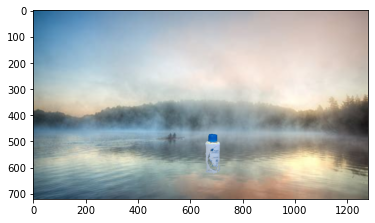

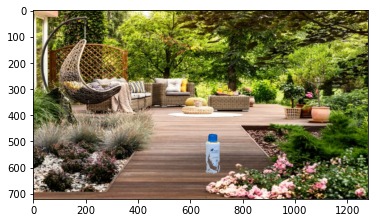

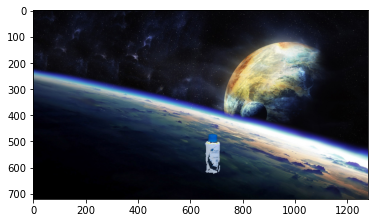

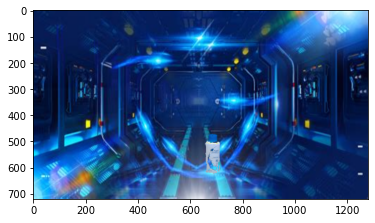

In [21]:
bg1 = cv2.imread('images/background1.png') #png
bg2 = cv2.imread('images/background2.png') #png
bg3 = cv2.imread('images/background3.png') #png
bg4 = cv2.imread('images/background4.png') #png

bg1 = cv2.cvtColor(bg1, cv2.COLOR_BGR2RGB)
bg2 = cv2.cvtColor(bg2, cv2.COLOR_BGR2RGB)
bg3 = cv2.cvtColor(bg3, cv2.COLOR_BGR2RGB)
bg4 = cv2.cvtColor(bg4, cv2.COLOR_BGR2RGB)

no_bg = RemoveGreen(scene_1)
no_bg = cv2.cvtColor(no_bg, cv2.COLOR_BGR2RGB)


new_bg1 = NewBackground(no_bg, bg1)
plt.imshow(new_bg1)
plt.show()

new_bg2 = NewBackground(no_bg, bg2)
plt.imshow(new_bg2)
plt.show()

new_bg3 = NewBackground(no_bg, bg3)
plt.imshow(new_bg3)
plt.show()

new_bg4 = NewBackground(no_bg, bg4)
plt.imshow(new_bg4)
plt.show()

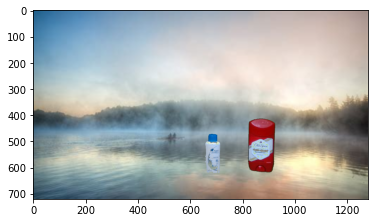

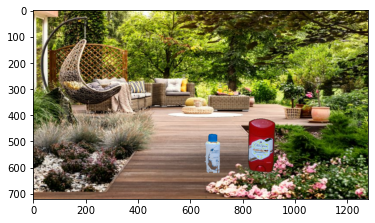

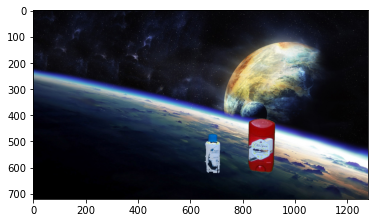

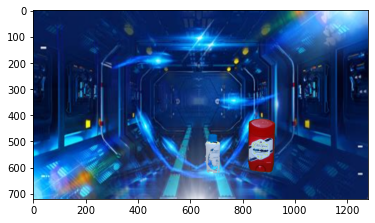

In [22]:
no_bg = RemoveGreen(scene_2)
no_bg = cv2.cvtColor(no_bg, cv2.COLOR_BGR2RGB)

new_bg1 = NewBackground(no_bg, bg1)
plt.imshow(new_bg1)
plt.show()

new_bg2 = NewBackground(no_bg, bg2)
plt.imshow(new_bg2)
plt.show()

new_bg3 = NewBackground(no_bg, bg3)
plt.imshow(new_bg3)
plt.show()

new_bg4 = NewBackground(no_bg, bg4)
plt.imshow(new_bg4)
plt.show()